In [58]:
# Vraag 01
# 50 procent van de bags zullen dan niet toegelaten worden

4.337244875098041


In [9]:
# Vraag 02
import pandas as pd
diabetes = pd.read_csv('diabetes_data.csv')

In [10]:
# Vraag 02
diabetes.AgeCategory.value_counts()

# 20-30 jaar oud -> 385

AgeCategory
20-30    385
30-40    163
40-50    117
50-60     56
60-70     28
70+        3
Name: count, dtype: int64

<Axes: ylabel='count'>

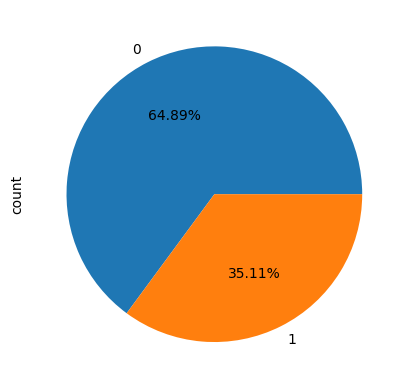

In [16]:
# Vraag 03
slp_data_pie = diabetes.Outcome.value_counts()
slp_data_pie.plot(kind = 'pie', autopct='%5.2f%%')
# 0 = geen, 1 = diabetes

In [17]:
# Vraag 04
pd.crosstab(diabetes.Glucose, diabetes.AgeCategory)
# gemidelde Glucose op de leeftijd

AgeCategory  20-30  30-40  40-50  50-60  60-70  70+
Glucose                                            
44.0             0      1      0      0      0    0
56.0             1      0      0      0      0    0
57.0             0      0      1      0      1    0
61.0             0      0      1      0      0    0
62.0             0      0      1      0      0    0
...            ...    ...    ...    ...    ...  ...
195.0            0      1      0      1      0    0
196.0            1      0      1      1      0    0
197.0            0      2      0      1      1    0
198.0            1      0      0      0      0    0
199.0            1      0      0      0      0    0

[135 rows x 6 columns]

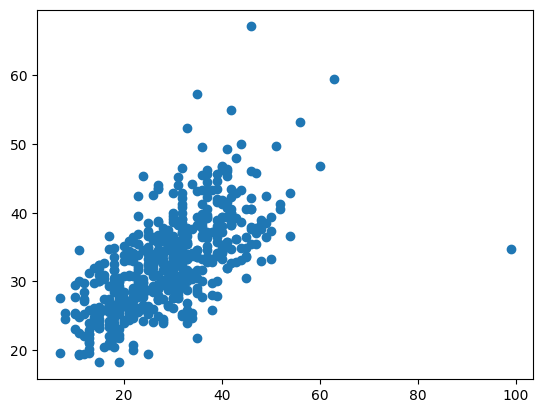

In [22]:
# Vraag 05
import matplotlib.pyplot as plt
plt.scatter(diabetes.SkinThickness, diabetes.BMI)
# in de plt.scatter kan je zien hoe deze vaak dicht bij elkaar ligen dussen mensen mesen en hogere bmi hebben ook vaak een
# grotere skinthicness ook het omgekeerde

In [29]:
# Vraag 06
for col in diabetes.columns:
    if diabetes[col].isna().mean() < 0.05: 
        diabetes.dropna(subset={col}, inplace=True)
    elif col in ['Glucose', 'BloodPressure']:  
        diabetes.loc[diabetes[col].isna(), col] = -3.36 + 0.99 * diabetes_data['BMI']
    else:  
        diabetes[col].fillna(diabetes[col].median(), inplace=True)

print(diabetes.isna().sum())
# er zijn geen NA waarden meer

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
AgeCategory                 0
Outcome                     0
dtype: int64


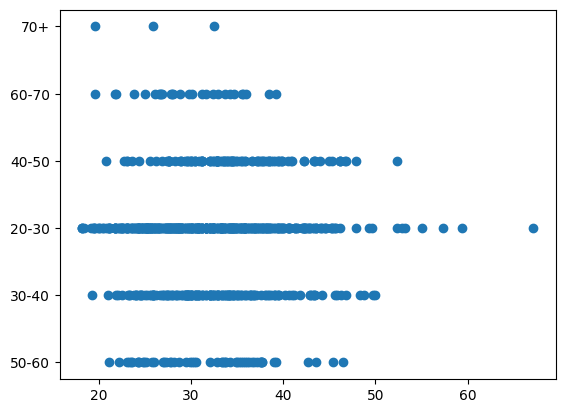

In [23]:
# Vraag 07
import matplotlib.pyplot as plt
plt.scatter(diabetes.BMI, diabetes.AgeCategory)
# het lijtk er op dat mensen op een jongere leeftijd een hogere bmi zal hebben dan op een latere leetijd

In [47]:
# Vraag 08
#wegschrijven naar een csv bestand 
diabetes.to_csv('diabetes_train_df_klaar.csv', index = False)
diabetes_ML = pd.read_csv('diabetes_train_df_klaar.csv')
diabetes_ML = diabetes_ML.drop(['Insulin','SkinThickness', 'BloodPressure'], axis=1
# tabelen droppen die niet relevant zijn voor ML

In [48]:
# vraag 08
from sklearn.model_selection import train_test_split
X = diabetes_ML.drop('Outcome', axis=1)
y = diabetes_ML['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# test en training samples maken 80 procent is train 20 test

In [49]:
# vraag 08
X_train.shape, y_train.shape

((579, 4), (579,))

In [50]:
# vraag 08
X_test.shape, y_test.shape

((145, 4), (145,))

In [53]:
# vraag 08
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
X_train['AgeCategory'] = label.fit_transform(X_train['AgeCategory'])
X_test['AgeCategory'] = label.transform(X_test['AgeCategory'])
# zorgen dat er dummy variabelen zijn anders error over convert float

In [55]:
# vraag 08
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty= 'l2', solver='liblinear').fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

In [57]:
# vraag 08
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(y_test, y_pred) 
prec = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)

print('accuracy score', acc) 
print('precision score', prec) 
print('recall score', recall) 

accuracy score 0.8
precision score 0.7058823529411765
recall score 0.5581395348837209


In [ ]:
# vraag 09 (Bonus)
# hooge likelyhood op diabetes